##Многоклассовый классификатор

In [47]:
import matplotlib.pyplot as plt
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, LeakyReLU, Dropout
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.utils import to_categorical
from keras import metrics

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, RocCurveDisplay

In [45]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
data = pd.read_csv("/content/gdrive/My Drive/body/bodyPerformance.csv", sep=',')
data

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [4]:
data.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [6]:
dupl = data[data.duplicated()]
print(len(dupl))
dupl

1


,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
12473,27.0,F,157.0,49.1,30.7,70.0,86.0,27.7,19.7,51.0,167.0,A


In [7]:
data.drop_duplicates(inplace = True)
dupl = data[data.duplicated()]
print(len(dupl))
dupl

0


,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class


In [8]:
data[['gender']].head(20)

,gender
0,M
1,M
2,M
3,M
4,M
5,F
6,F
7,M
8,M
9,M


In [9]:
data[['class']].head(20)

,class
0,C
1,A
2,C
3,B
4,B
5,B
6,D
7,B
8,C
9,B


In [10]:
gender_map = {'F': 0, 'M': 1}
class_map = {'A': 0, 'B': 1, 'C': 2, 'D': 3}

data['GenderNum'] = data['gender'].map(gender_map)
data['TargetMult'] = data['class'].map(class_map)
data[['gender', 'GenderNum', 'class', 'TargetMult']].head(20)

,gender,GenderNum,class,TargetMult
0,M,1,C,2
1,M,1,A,0
2,M,1,C,2
3,M,1,B,1
4,M,1,B,1
5,F,0,B,1
6,F,0,D,3
7,M,1,B,1
8,M,1,C,2
9,M,1,B,1


In [12]:
X = data.drop(['gender', 'class', 'TargetMult'], axis = 1)
y = data[['TargetMult']]

min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [13]:
X_all_train, X_test, y_all_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.3, random_state = 0)
print(f'All Train : {X_all_train.shape}, Test : {X_test.shape}')

X_train, X_val, y_train, y_val = train_test_split(X_all_train, y_all_train, stratify = y_all_train, test_size = 0.2, random_state = 0)
print(f'Train : {X_train.shape}, Test : {X_val.shape}')

All Train : (9374, 11), Test : (4018, 11)
Train : (7499, 11), Test : (1875, 11)


In [14]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [15]:
classifier_mult1 = Sequential()
classifier_mult1.add(Dense(32,activation = 'relu',input_dim = X_train.shape[1]))
classifier_mult1.add(Dense(16,activation = 'selu'))
classifier_mult1.add(Dense(8,activation = 'selu'))
classifier_mult1.add(Dense(4,activation = 'softmax'))

In [16]:
classifier_mult1.compile(loss = 'categorical_crossentropy', optimizer = 'adamax', metrics=['accuracy', metrics.Precision(name = 'precision'), metrics.Recall(name = 'recall'), metrics.AUC(name = 'auc')])

In [21]:
classifier_mult1_history = classifier_mult1.fit(X_train, y_train, batch_size = 64, validation_data = (X_val,y_val), epochs = 100)

Epoch 1/100
118/118 [==============================] - 0s 3ms/step - loss: 0.8101 - accuracy: 0.6472 - precision: 0.7368 - recall: 0.4831 - auc: 0.8845 - val_loss: 0.8345 - val_accuracy: 0.6320 - val_precision: 0.7081 - val_recall: 0.4592 - val_auc: 0.8763
Epoch 2/100
118/118 [==============================] - 0s 3ms/step - loss: 0.8101 - accuracy: 0.6493 - precision: 0.7328 - recall: 0.4893 - auc: 0.8847 - val_loss: 0.8457 - val_accuracy: 0.6080 - val_precision: 0.6923 - val_recall: 0.4272 - val_auc: 0.8691
Epoch 3/100
118/118 [==============================] - 0s 3ms/step - loss: 0.8143 - accuracy: 0.6465 - precision: 0.7293 - recall: 0.4858 - auc: 0.8835 - val_loss: 0.8353 - val_accuracy: 0.6208 - val_precision: 0.6967 - val_recall: 0.4581 - val_auc: 0.8742
Epoch 4/100
118/118 [==============================] - 0s 3ms/step - loss: 0.8099 - accuracy: 0.6532 - precision: 0.7314 - recall: 0.4917 - auc: 0.8850 - val_loss: 0.8372 - val_accuracy: 0.6235 - val_precision: 0.7025 - val_recal

In [19]:
classifier_mult2 = Sequential()
classifier_mult2.add(Dense(64,activation = 'relu',input_dim=X_train.shape[1]))
classifier_mult2.add(Dense(32,activation = 'softplus'))
classifier_mult2.add(Dense(16,activation = 'softplus'))
classifier_mult2.add(Dense(4,activation = 'softmax'))

In [20]:
classifier_mult2.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics=['accuracy', metrics.Precision(name = 'precision'), metrics.Recall(name = 'recall'), metrics.AUC(name = 'auc')])

In [22]:
classifier_mult1_history = classifier_mult2.fit(X_train, y_train, batch_size = 64, validation_data = (X_val, y_val), epochs = 100)

Epoch 1/100
118/118 [==============================] - 2s 9ms/step - loss: 1.3929 - accuracy: 0.2670 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5075 - val_loss: 1.3851 - val_accuracy: 0.2491 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5203
Epoch 2/100
118/118 [==============================] - 1s 7ms/step - loss: 1.3842 - accuracy: 0.2636 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5265 - val_loss: 1.3834 - val_accuracy: 0.3280 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5404
Epoch 3/100
118/118 [==============================] - 1s 7ms/step - loss: 1.3826 - accuracy: 0.2854 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5388 - val_loss: 1.3837 - val_accuracy: 0.2501 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5399
Epoch 4/100
118/118 [==============================] - 1s 9ms/step - loss: 1.3819 - accuracy: 0.2770 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5529 - val_loss: 1.3827 - 

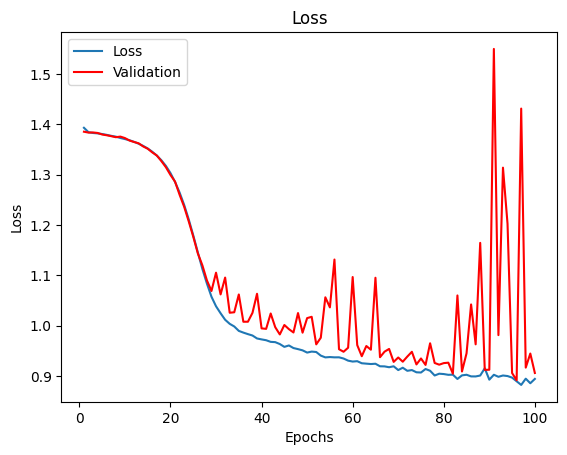

In [28]:
loss= classifier_mult1_history.history['loss']
val_loss = classifier_mult1_history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.title('Loss')
plt.plot(epochs, loss, label = 'Loss')
plt.plot(epochs, val_loss, color = 'red', label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

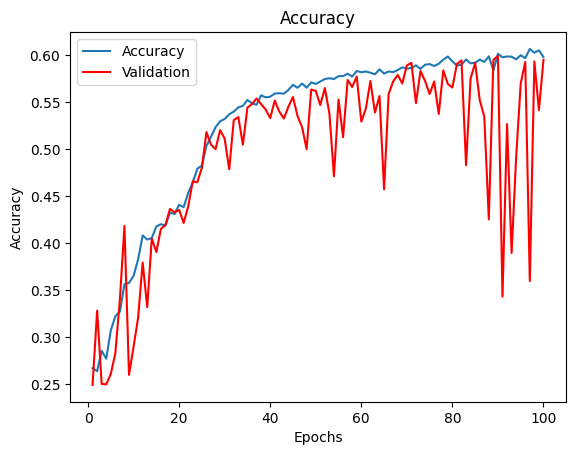

In [29]:
accuracy = classifier_mult1_history.history['accuracy']
val_accuracy = classifier_mult1_history.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)

plt.title('Accuracy')
plt.plot(epochs, accuracy, label = 'Accuracy')
plt.plot(epochs, val_accuracy, color = 'red', label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

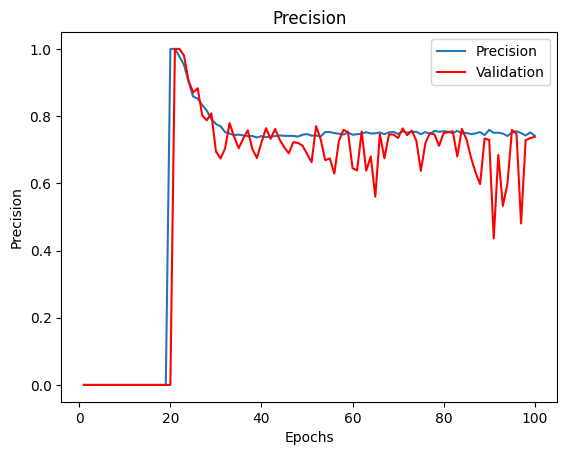

In [30]:
precision = classifier_mult1_history.history['precision']
val_precision = classifier_mult1_history.history['val_precision']

epochs = range(1, len(precision) + 1)

plt.title('Precision')
plt.plot(epochs, precision, label = 'Precision')
plt.plot(epochs, val_precision, color = 'red', label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.show()

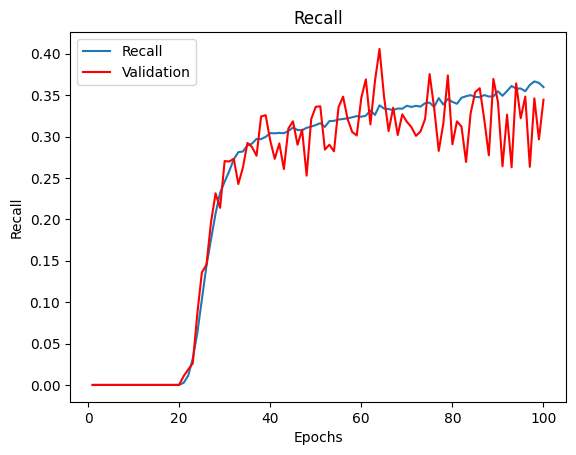

In [32]:
recall = classifier_mult1_history.history['recall']
val_recall = classifier_mult1_history.history['val_recall']
epochs = range(1, len(recall) + 1)

plt.title('Recall')
plt.plot(epochs, recall, label='Recall')
plt.plot(epochs, val_recall, color = 'red', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.show()

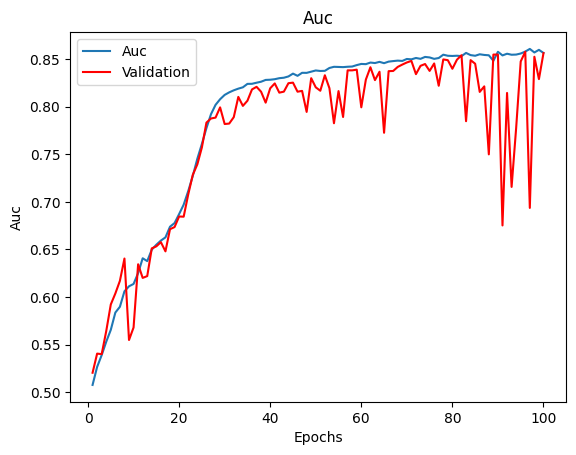

In [35]:
auc = classifier_mult1_history.history['auc']
val_auc = classifier_mult1_history.history['val_auc']
epochs = range(1, len(auc) + 1)

plt.title('Auc')
plt.plot(epochs, auc, label = 'Auc')
plt.plot(epochs, val_auc, color = 'red', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Auc')
plt.legend()
plt.show()

In [48]:
x_test_pattern = X_test[6,:]
original_features= min_max_scaler.inverse_transform(x_test_pattern.reshape(1,-1))
print(original_features)
y_pred = classifier_mult1.predict(x_test_pattern.reshape(1,-1))
print(y_pred[0])

[[ 28.  171.8  64.7  11.6  81.  136.   46.9  19.7  54.  230.    1. ]]
1/1 [==============================] - 0s 25ms/step
[0.7356304  0.21987326 0.04345296 0.00104336]


126/126 [==============================] - 0s 2ms/step


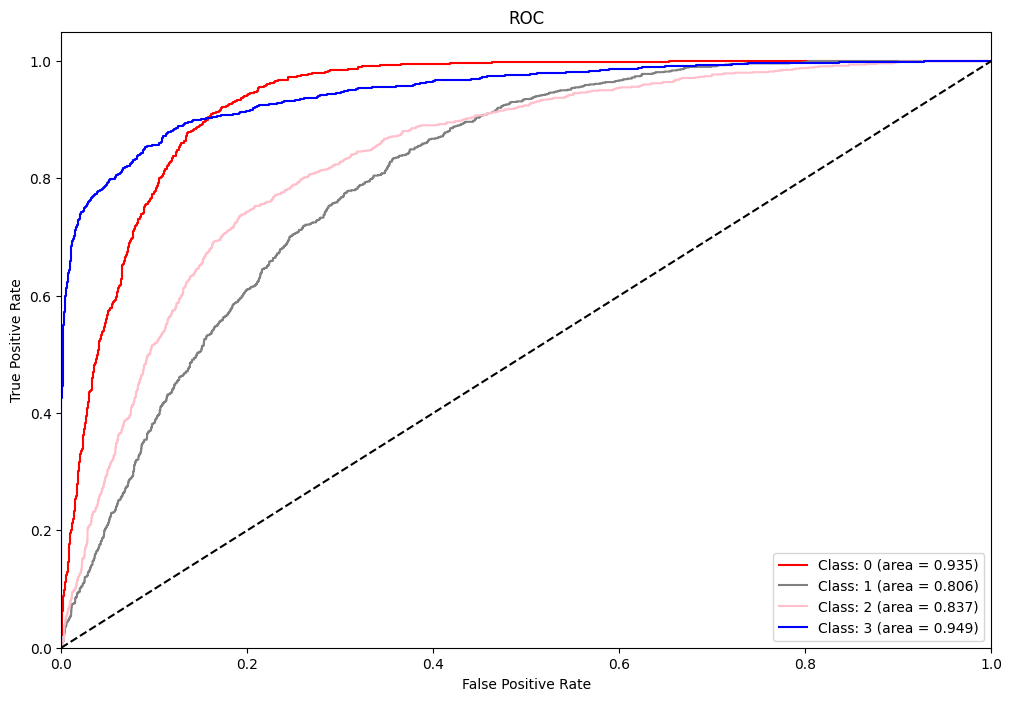

In [43]:
y_prob = classifier_mult1.predict(X_test)
n_classes = y_test.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(12, 8))
colors = ['red', 'gray', 'pink', 'blue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='Class: {0} (area = {1:0.3f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc = "lower right")
plt.show()